In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

np.random.seed(20160612)
tf.set_random_seed(20160612)

In [2]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
num_units = 1024

x  = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_predictionn = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictionn, tf.float32))

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [6]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f' %  (i, loss_val, acc_val))

Step: 100, Loss: 3136.286133, Accuracy: 0.906700
Step: 200, Loss: 2440.697266, Accuracy: 0.928000
Step: 300, Loss: 1919.005127, Accuracy: 0.941900
Step: 400, Loss: 1982.860474, Accuracy: 0.939400
Step: 500, Loss: 1734.469604, Accuracy: 0.945500
Step: 600, Loss: 1377.535767, Accuracy: 0.956100
Step: 700, Loss: 1332.846191, Accuracy: 0.960600
Step: 800, Loss: 1184.055786, Accuracy: 0.963600
Step: 900, Loss: 1134.486084, Accuracy: 0.964700
Step: 1000, Loss: 1236.646973, Accuracy: 0.961900
Step: 1100, Loss: 1116.422607, Accuracy: 0.965500
Step: 1200, Loss: 1125.365234, Accuracy: 0.964700
Step: 1300, Loss: 1193.366455, Accuracy: 0.961900
Step: 1400, Loss: 1101.244019, Accuracy: 0.966800
Step: 1500, Loss: 1062.340088, Accuracy: 0.969400
Step: 1600, Loss: 1112.656494, Accuracy: 0.966600
Step: 1700, Loss: 953.149597, Accuracy: 0.972200
Step: 1800, Loss: 960.959900, Accuracy: 0.970900
Step: 1900, Loss: 1035.524292, Accuracy: 0.967900
Step: 2000, Loss: 990.451782, Accuracy: 0.970600


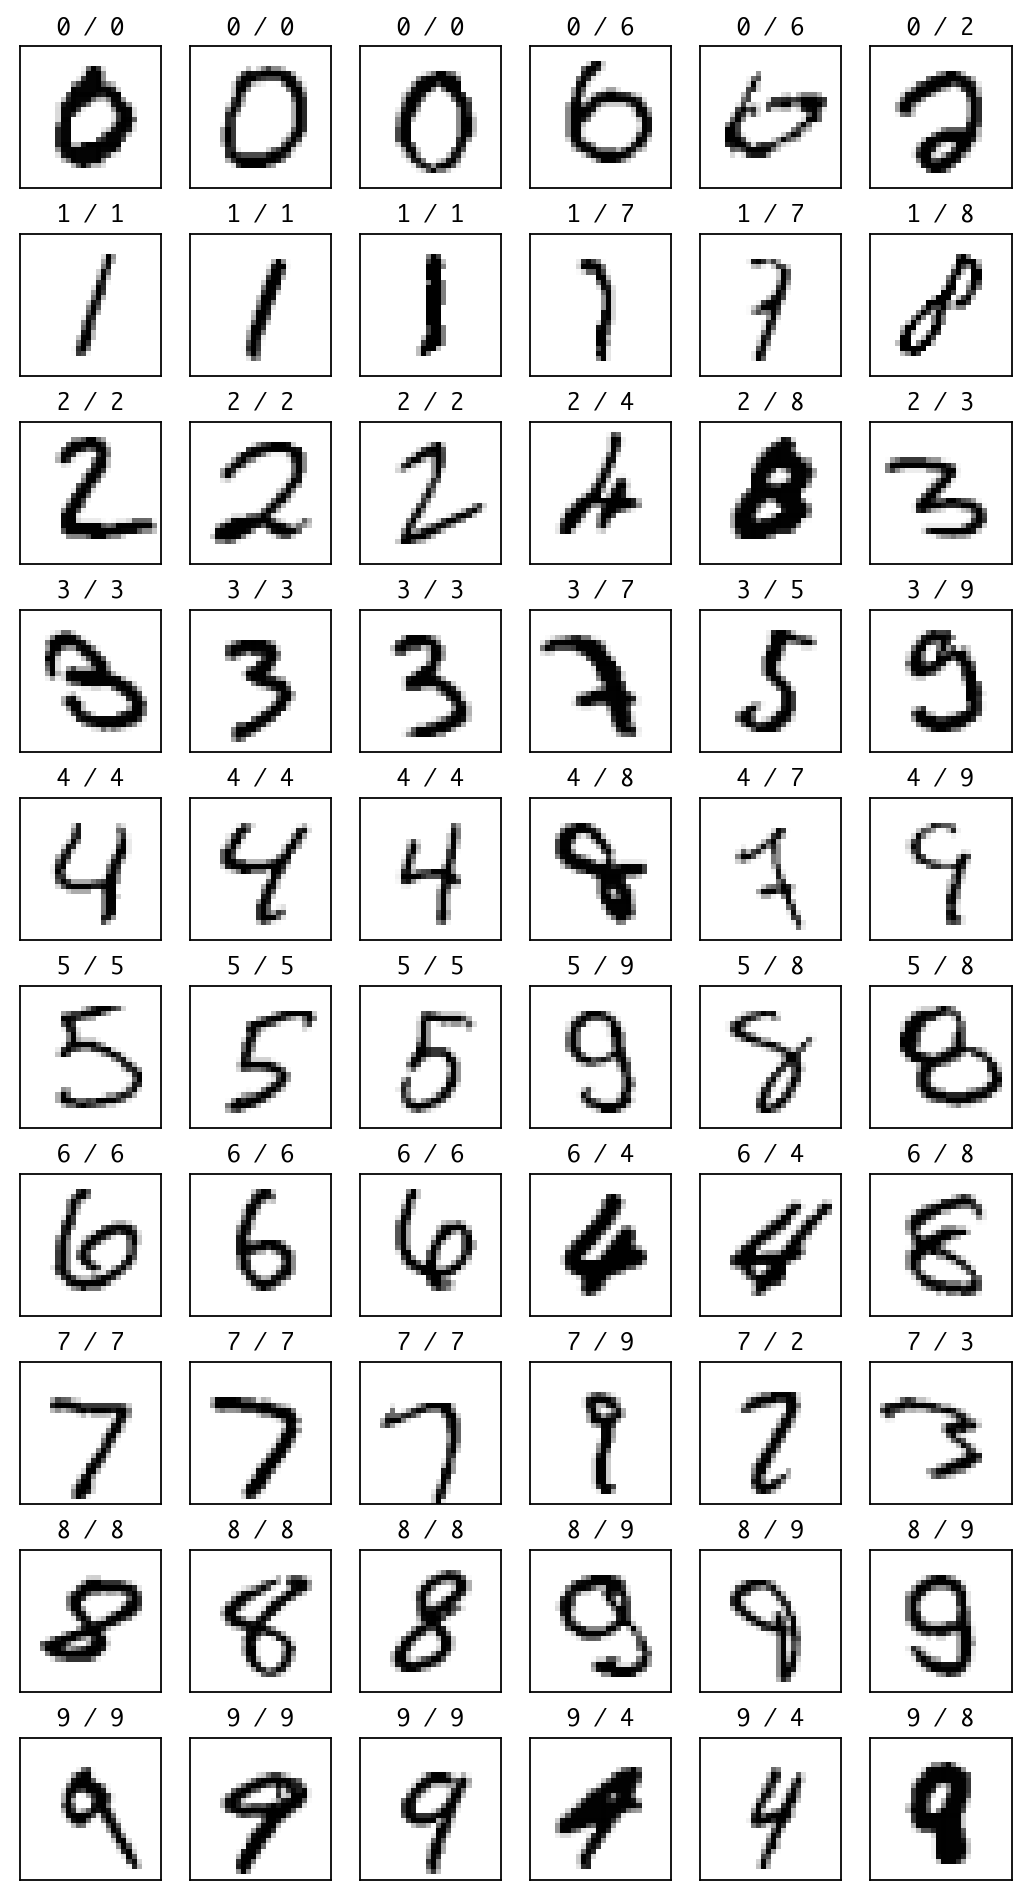

In [7]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x: images, t: labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i *6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
            
            c += 1
            if c > 6:
                break